### Data  
- foundation is a dataset of approximately 1000 single page documents from the Handelsregister 
- it includes mostly documents containing some sort of "Anmeldung an das Handelsregister"

### Clustering  
- idea: cluster the data to see if indiviual groups are distinguishable 
- result: unfortunately, the documents are to similar in content to be able to effectively cluster them  
    -> still valuable information for me

### Annotation  
- to apply effectively a custom ner model, annotated is necessary to be able to train the model 
- around 200 documents were annotated and split into: 70% TRAINING_DATA, 10% VAL_DATA, 20% TEST_DATA
- doccano was used as annotation tool

##### Annotation Labels  
- approach: first trying a fine-grained annotation  
    -> if this should result in ineffectiveness than a coarser approach is tried

- entities:
    - general: DATE, HRA/HRB, DOCUMENT_NUMBER, LOCATION (if it is not clearly connected to one other entity)
    - regarding someone involved with the company: NAME, NAME_STREET, NAME_POSTAL_CODE, NAME_LOCATION, BIRTH_DATE
    - regarding the mentioned company: COMPANY, COMPANY_STREET, COMPANY_POSTAL_CODE, COMPANY_LOCATION
    - regarding the mentioned court: COURT, COURT_STREET, COURT_POSTAL_CODE, COURT_LOCATION
    - regarding mentioned notary: NOTARY, NOTARY_STREET, NOTARY_POSTAL_CODE, NOTARY_LOCATION  
  
    - annotated but taken out of the data: CONTENT

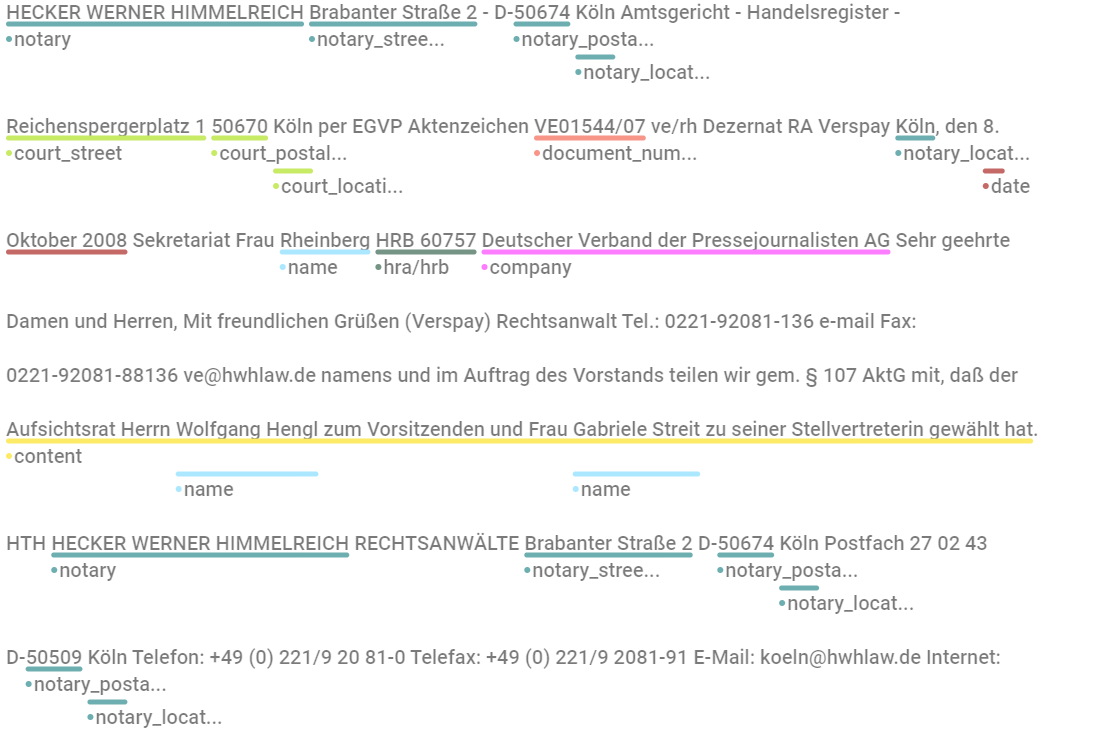

### TEST_O: SpaCy-Pipeline  
- use the given spacy pipeline to see what happens with my data

In [1]:
%run /home/teppi/projects/master/app/spacy_test_0.py

Urkundenrolle PER
Notarkanzlei LOC
Johann-Gottfried-Pahl-Straße LOC
Aalen LOC
Ulm LOC
Zeughausgasse MISC
Ulm HRB LOC
GUIRAUD ORG
Ulm Handelsregisteranmeldung I. LOC
Andreas Kirsch PER
Talstraße LOC
Staig LOC
Andreas Kirsch PER


- result: entities are recognized, but is it possible to specify the entities even more? 

### TEST_1: creating custom SpaCy-model  
- create a blank German Language Model 
- add ner pipeline to this model
- train 
- save model 

##### Evaluation of TEST_1

In [3]:
%run /home/teppi/projects/master/app/spacy_evaluate_1.py

/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Urkundenrolle Nummer R 3219 Gesellschafterversamml..." with entities "[[21, 27, 'DOCUMENT_NUMBER'], [131, 147, 'COMPANY'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "URNr.: 467/2017 An das Amtsgericht Siegen -Handels..." with entities "[[7, 15, 'DOCUMENT_NUMBER'], [23, 41, 'COURT'], [6...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/train

Precision: 0.7704590818363274
Recall: 0.6843971631205674
F1 score: 0.7248826291079813


### TEST_2: creating custom SpaCy-model with VAL_DATA
- same as TEST_1 but the VALIDATION_DATA was implemented trying to enhance the result

##### Evaluation of TEST_2

In [5]:
%run /home/teppi/projects/master/app/spacy_evaluate_2.py

/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Urkundenrolle Nummer R 3219 Gesellschafterversamml..." with entities "[[21, 27, 'DOCUMENT_NUMBER'], [131, 147, 'COMPANY'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "URNr.: 467/2017 An das Amtsgericht Siegen -Handels..." with entities "[[7, 15, 'DOCUMENT_NUMBER'], [23, 41, 'COURT'], [6...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/train

Precision: 0.7586872586872587
Recall: 0.6968085106382979
F1 score: 0.7264325323475046


### TEST_3: finetuning 
- German LM **de_core_news_lg** was taken as foundation of the finetuning process
- code was adjusted to take this model instead of a German blank model 

##### Evaluation of TEST_3: without VAL_DATA

In [6]:
%run /home/teppi/projects/master/app/spacy_evaluate_1_finetuned.py

/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Urkundenrolle Nummer R 3219 Gesellschafterversamml..." with entities "[[21, 27, 'DOCUMENT_NUMBER'], [131, 147, 'COMPANY'...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "URNr.: 467/2017 An das Amtsgericht Siegen -Handels..." with entities "[[7, 15, 'DOCUMENT_NUMBER'], [23, 41, 'COURT'], [6...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/home/teppi/projects/master/.venv/lib/python3.11/site-packages/spacy/train

Precision: 0.810126582278481
Recall: 0.7943262411347518
F1 score: 0.8021486123545211


##### Evaluation of TEST_3: with VAL_DATA

In [8]:
%run /home/teppi/projects/master/app/spacy_evaluate_2_finetuned.py

Precision: 0.7809187279151943
Recall: 0.7836879432624113
F1 score: 0.7823008849557522


### Next Steps in NER
- parameter adjust  (epochen, early stopping, overfitting)
- use transformers on the basis of spacy to see what kind of performance boost could be possible
- domain adaption 
- maybe: test another library which uses spacy as foundation but performs differently: zshot

### Next Steps Overall
- find out how Named Entitiy Linking is possible
    -> creating a Graph, which library (Zshot)
- what other things could be also possible on this basis
- it could be possible that more data needs to be annotated 